In [6]:
from halophot.halo_tools import halo_tpf

from halophot.halo_tools import plot_weightmap

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [7]:
plt.style.use(lk.MPLSTYLE)

In [8]:
# something I prepared earlier...

filename = '/home/tim/.lightkurve-cache/mastDownload/TESS/tess2018349182459-s0006-0000000269273552-0126-s/tess2018349182459-s0006-0000000269273552-0126-s_tp.fits'

In [9]:
# what does halo_tpf do
tpf = halo_tpf(filename)


In [10]:
tpf

TessTargetPixelFile(TICID: 269273552)

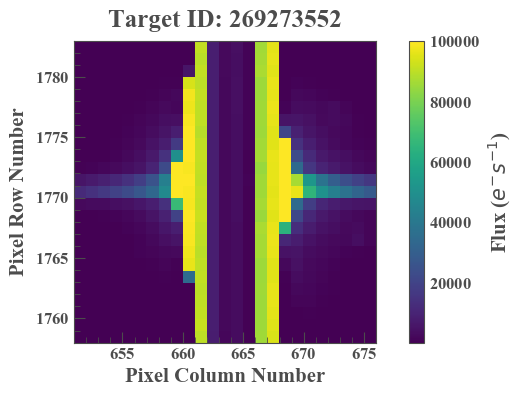

In [11]:
tpf.plot()

In [12]:
# need to make a mask in this case

mask = np.ones((tpf.flux.shape[1],tpf.flux.shape[2]),dtype='bool')

xx, yy = np.meshgrid(np.arange(mask.shape[0]),np.arange(mask.shape[1]))
mask[(xx > 8) & (xx < 17)] = False

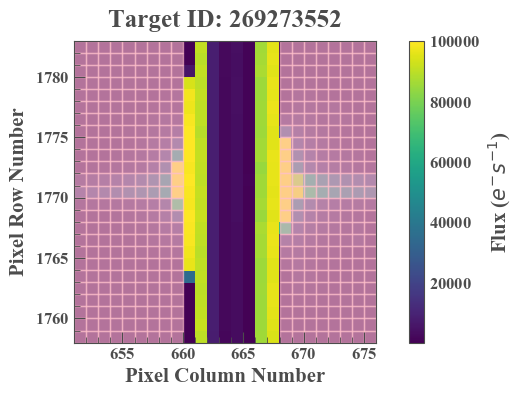

In [14]:
# plot mask
tpf.plot(aperture_mask=mask)

In [15]:
# run tpf.halo

weightmap, corr_lc = tpf.halo(mask=mask, thresh = 0)

Taking cadences from beginning to end
0 saturated pixels
Throwing out 8 bad cadences
Censored TPF
Subsampling by a factor of 1
Calculating weights
Using Analytic Derivatives
Calculated weights!


In [16]:
# what is weightmap?
weightmap

{'initial_cadence': 173388,
 'final_cadence': 189064,
 'sat_pixels': 25,
 'weightmap': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 5.41702465e-04, 1.21734198e-03,
         3.39771996e-02, 1.53065400e-03, 6.71300959e-04, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 5.10946383e-04, 1.61082122e-03,
         4.22154134e-02, 1.51254393e-03, 7.41592557e-04, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.0

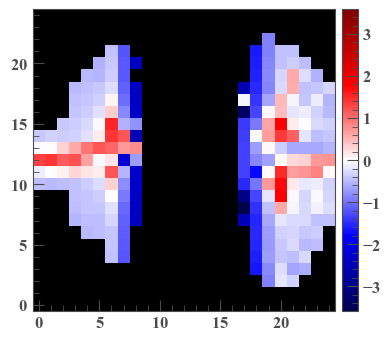

In [17]:
# plot the weightmap

fig,axes = plt.subplots(1,1)

# wm = weightmap

# cmap = mpl.cm.seismic
# norm = np.sum((wm['weightmap']) > 0)
# cmap.set_bad('k',1.)
# im = np.log10(wm['weightmap'].T*norm)
# axes.imshow(im,cmap=cmap, vmin=-2*np.nanmax(im),vmax=2*np.nanmax(im),
#     interpolation='None',origin='lower',aspect=1)

# plt.show()

plot_weightmap(axes,weightmap['weightmap'],'betelgeuse')

In [18]:
# plot corr_lc
corr_lc

TessLightCurve(TICID: 269273552)

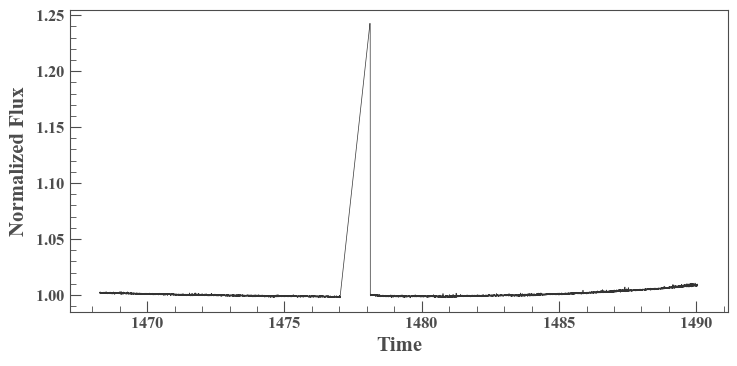

In [19]:
corr_lc.plot()

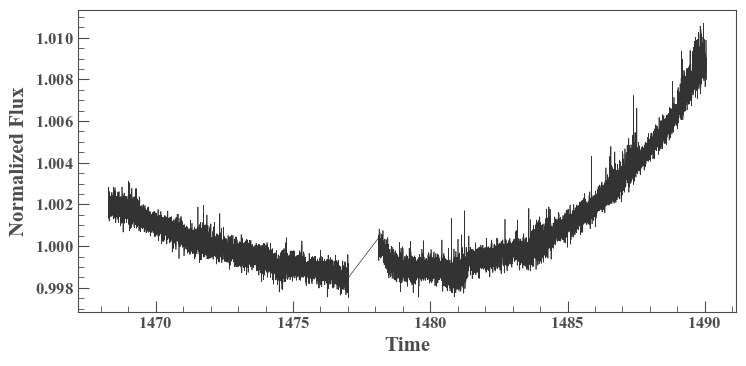

In [20]:
corr_lc.remove_outliers().plot()

In [21]:
# Compare to AAVSO data

aavso = pd.read_csv('/home/tim/science/astero/TESS/halo/tess/data/betelgeuse/aavsodata_betelgeuse.txt')

/home/tim/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12,14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
aavso

,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,...,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
0,2.412808e+06,0.6,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
1,2.412816e+06,0.6,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
2,2.412824e+06,0.8,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
3,2.412826e+06,0.8,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
4,2.412830e+06,0.6,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
5,2.412832e+06,0.8,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
6,2.412842e+06,0.8,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
7,2.412860e+06,0.8,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
8,2.412878e+06,0.5,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS
9,2.412880e+06,0.8,NaN,NaN,Vis.,PJM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ALPHA ORI,BAA-VSS,STD,NaN,NaN,NaN,BAAVSS


In [23]:
mag = aavso.query('Band=="V"')['Magnitude'].astype('float64').values
intensity = 10**(-(mag-np.nanmedian(mag))/2.5)

time = time=aavso.query('Band=="V"')['JD'].values - 2457000

In [25]:
aavso_lc = lk.LightCurve(time=time,flux=intensity)

(0.2, 1.4)

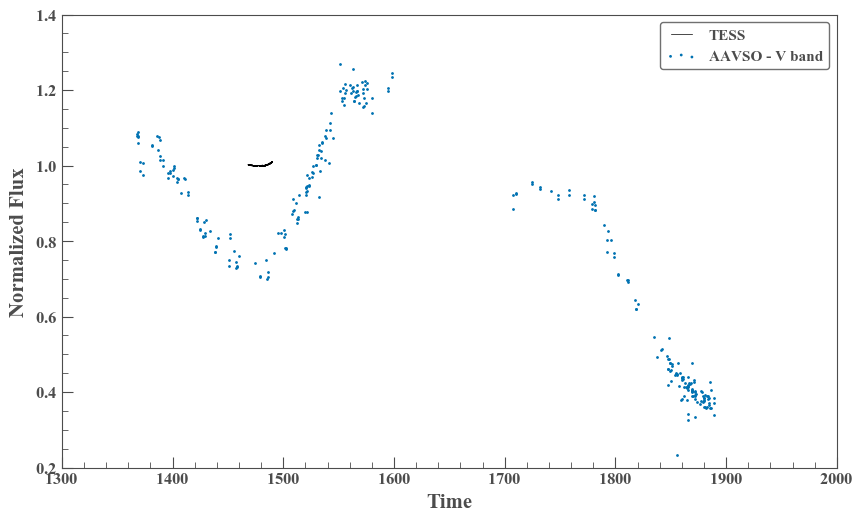

In [26]:
fig,axes = plt.subplots(1,1,figsize=(10,6))
corr_lc.remove_outliers().plot(ax=axes,color='black',label='TESS')
aavso_lc.remove_nans().scatter(ax=axes,color='C1',label='AAVSO - V band')
axes.set_xlim(1300,2000)
axes.set_ylim(0.2,1.4)

## Aldebaran

In [27]:
lk.search_targetpixelfile('aldebaran')

SearchResult containing 1 data products.

 target_name           productFilename                        description              distance
------------- ---------------------------------- ------------------------------------- --------
ktwo200173843 ktwo200173843-c13_lpd-targ.fits.gz Target Pixel Long Cadence (KTL) - C13      0.0

In [28]:
filename = '/home/tim/.lightkurve-cache/mastDownload/K2/ktwo200173843-c13_lc/ktwo200173843-c13_lpd-targ.fits.gz'

In [29]:
halo_tpf(filename)

/home/tim/anaconda3/lib/python3.7/site-packages/lightkurve/targetpixelfile.py:1491: LightkurveWarning: A Kepler data product is being opened using the `TessTargetPixelFile` class. Please use `KeplerTargetPixelFile` instead.
  LightkurveWarning)


TessTargetPixelFile(TICID: None)

In [30]:
from halophot.halo_tools import kephalo_tpf as halo_tpf

In [31]:
halo_tpf(filename)

KeplerTargetPixelFile Object (ID: 200173843)

In [32]:
tpf = halo_tpf(filename)

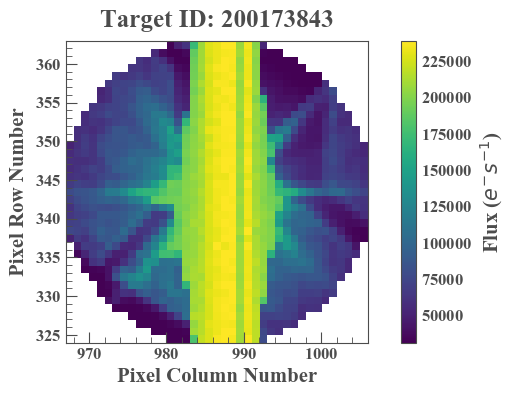

In [33]:
tpf.plot()

In [46]:
weightmap, corr_lc = tpf.halo(thresh = 0.8, lag=1)

Taking cadences from beginning to end
350 saturated pixels
Throwing out 3 bad cadences
Censored TPF
Subsampling by a factor of 1
Calculating weights
Using Analytic Derivatives
Calculated weights!


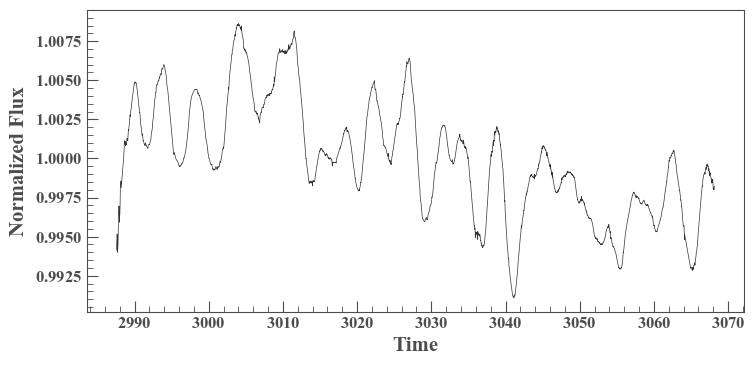

In [47]:
corr_lc.plot()

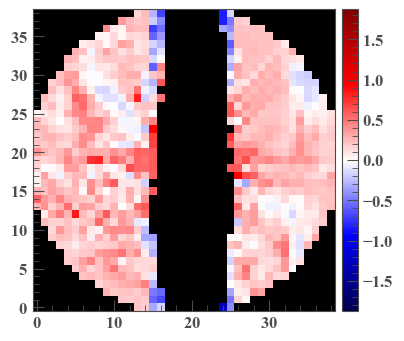

In [48]:
fig,axes = plt.subplots(1,1)

# wm = weightmap

# cmap = mpl.cm.seismic
# norm = np.sum((wm['weightmap']) > 0)
# cmap.set_bad('k',1.)
# im = np.log10(wm['weightmap'].T*norm)
# axes.imshow(im,cmap=cmap, vmin=-2*np.nanmax(im),vmax=2*np.nanmax(im),
#     interpolation='None',origin='lower',aspect=1)

# plt.show()

plot_weightmap(axes,weightmap['weightmap'],'aldebaran')